In [1]:
import numpy as np
import matplotlib.pyplot as plt
from your_DBSCAN import my_DBSCAN, plot_iris, visualize_dbscan, estime_minpts, estime_eps

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

colors =['k','r','b','g','c','m',]
n_colors = 6


# grid search

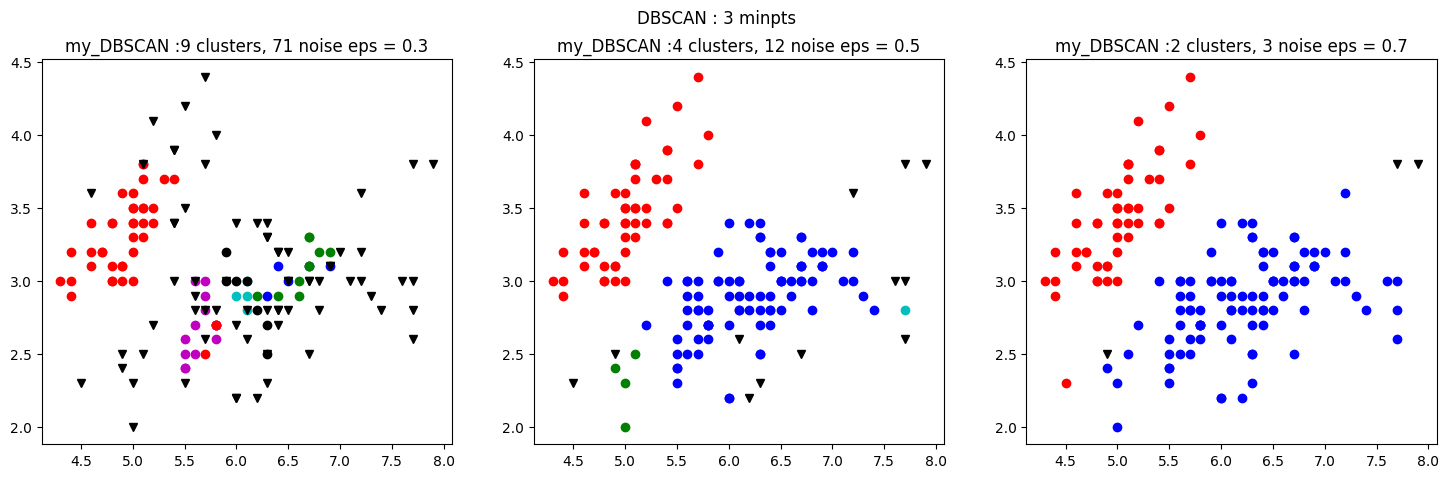

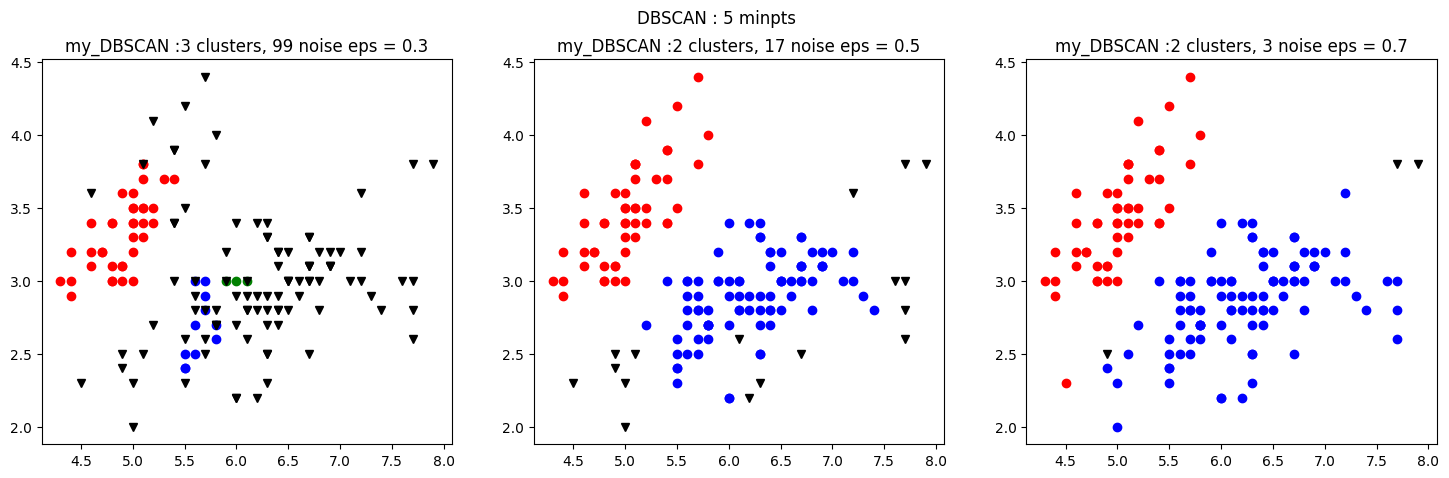

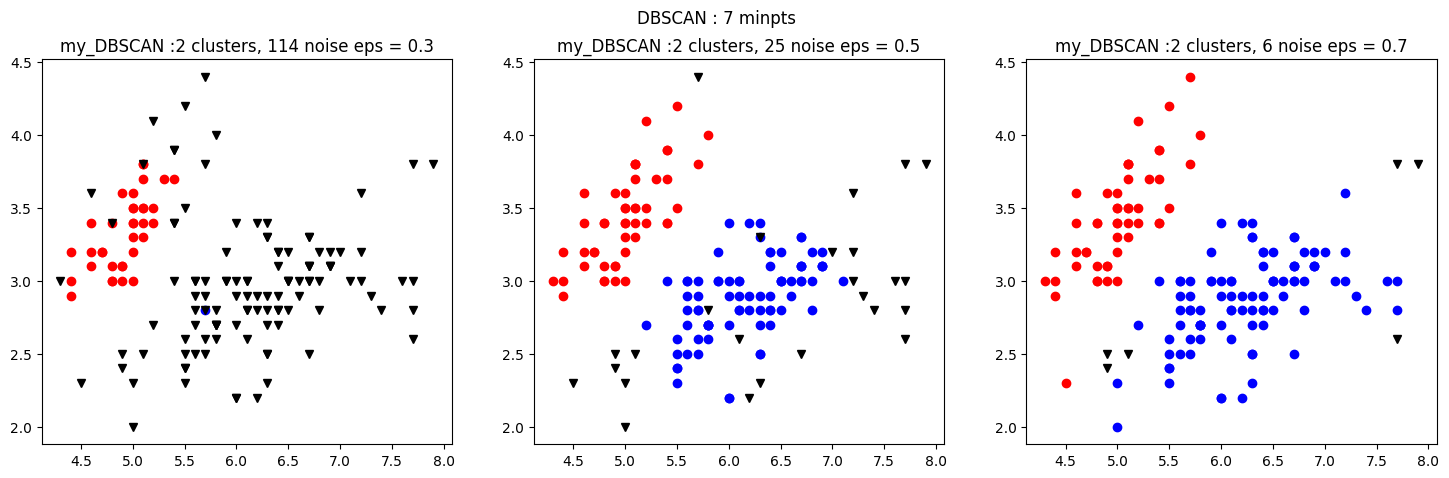

In [3]:
eps =  np.array([ 0.3, 0.5, 0.7])
minpts = np.array([ 3, 5, 7])
results = []

def visualisation_iris(X, minpts):
    i=1
    for t in [0.3,0.5,0.7]:
        my_y = my_DBSCAN(X,t,minpts)
        statistiques = np.unique(my_y,return_counts=True)
        K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
        Bruit = [p for p in range(len(my_y)) if my_y[p]==-1]
        results.append([K, len(Bruit)])
        fig = plt.figure(3, figsize=(18, 5))
        fig.suptitle('DBSCAN : '+str(minpts)+' minpts')
        
        plt.subplot(1,3,i)
        for k in range(1,K+1):
            plt.plot(X[my_y==k, 0], X[my_y==k, 1], colors[k%n_colors]+'o')
        plt.plot(X[my_y==-1, 0], X[my_y==-1, 1], 'kv')
    
        plt.title('my_DBSCAN :'+str(K)+' clusters, '+str(len(Bruit))+' noise'+' eps = '+str(t))
        i+=1
    plt.show()

for minpt in minpts:
    visualisation_iris(X, minpt)


In [4]:
results = np.array(results)
results = results.reshape((len(eps),len(minpts),2))
p = pd.DataFrame( index=minpts, columns=eps, )
for i in range(len(eps)):
    for j in range(len(minpts)):
        p.loc[minpts[i],eps[j]] = results[i,j]

print(p)

        0.3      0.5     0.7
3   [9, 71]  [4, 12]  [2, 3]
5   [3, 99]  [2, 17]  [2, 3]
7  [2, 114]  [2, 25]  [2, 6]


In [5]:
# variance du nombre de cluster en fonction de eps et minpts 
print("eps fixé", np.var(results[:, :, 0], axis=0)) # eps fixé
print("minpts fixé", np.var(results[:, :, 0], axis=1)) # minpts fixé

eps fixé [9.55555556 0.88888889 0.        ]
minpts fixé [8.66666667 0.22222222 0.        ]


In [6]:
# variance du nombre de bruit en fonction de eps et minpts
print("eps fixé", np.var(results[:, :, 1], axis=0)) # eps fixé
print("minpts fixé", np.var(results[:, :, 1], axis=1)) # minpts fixé

eps fixé [317.55555556  28.66666667   2.        ]
minpts fixé [ 909.55555556 1792.88888889 2216.22222222]


In [7]:

var_eps_K = np.var(results[:, :, 0], axis=0)
var_minpts_K = np.var(results[:, :, 0], axis=1)
var_eps_Bruit = np.var(results[:, :, 1], axis=0)
var_minpts_Bruit = np.var(results[:, :, 1], axis=1)

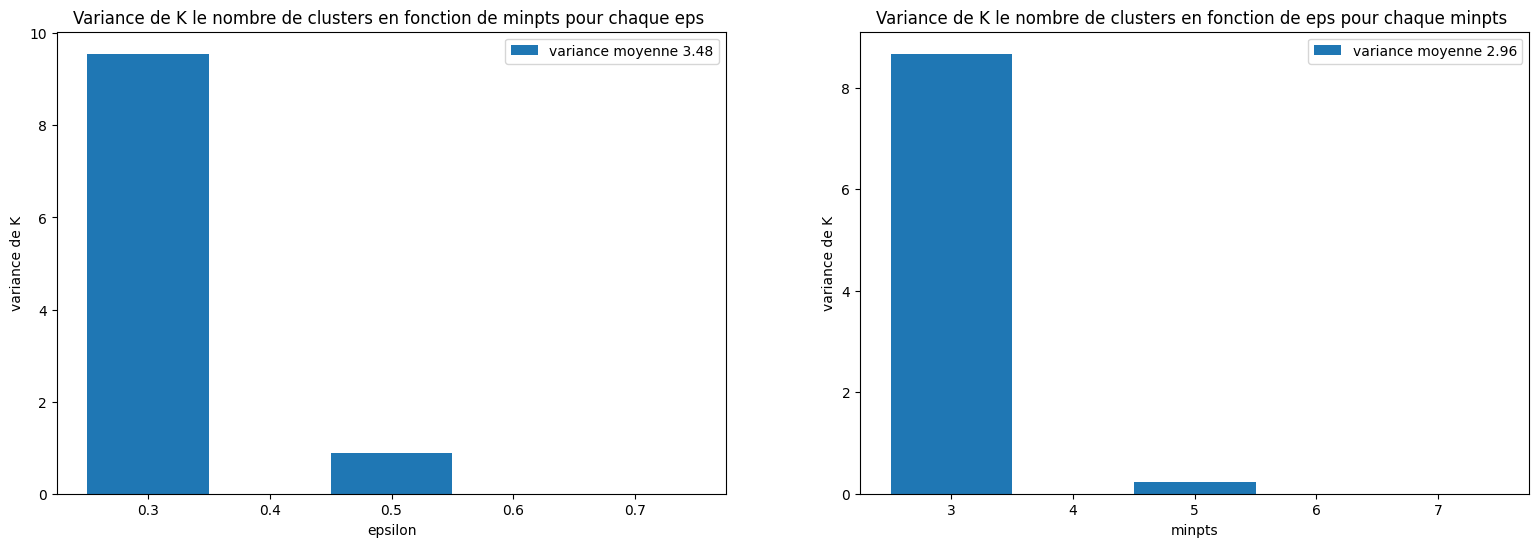

In [8]:
# Supposons que vous avez les tableaux array1, array2, index1 et index2
results = np.array(results)
results = results.reshape((len(eps),len(minpts),2))
p = pd.DataFrame( index=minpts, columns=eps, )
for i in range(len(eps)):
    for j in range(len(minpts)):
        p.loc[minpts[i],eps[j]] = results[i,j]

var_eps_K = np.var(results[:, :, 0], axis=0)
var_minpts_K = np.var(results[:, :, 0], axis=1)
var_eps_Bruit = np.var(results[:, :, 1], axis=0)
var_minpts_Bruit = np.var(results[:, :, 1], axis=1)

eps = np.array(eps)
minpts = np.array(minpts)


# Largeur des barres
bar_width = 1
eps_bar_width = 0.10

# Créer la figure et les axes
plt.subplots(1, 2, figsize=(19, 6))

plt.subplot(1, 2, 1)
# Créer les barres pour le premier tableau
plt.bar(eps, var_eps_K, eps_bar_width, label=f"variance moyenne {np.round(np.mean(var_eps_K), 2)}")
plt.xlabel('epsilon')
plt.ylabel('variance de K')
plt.title('Variance de K le nombre de clusters en fonction de minpts pour chaque eps ')
plt.legend()

plt.subplot(1, 2 ,2)
# Créer les barres pour le deuxième tableau
plt.bar(minpts, var_minpts_K, bar_width, label=f"variance moyenne {np.round(np.mean(var_minpts_K), 2)}")

# Ajouter des labels et un titre
plt.xlabel('minpts')
plt.ylabel('variance de K')
plt.title('Variance de K le nombre de clusters en fonction de eps pour chaque minpts ')
plt.legend()
# Afficher le graphique
plt.show()

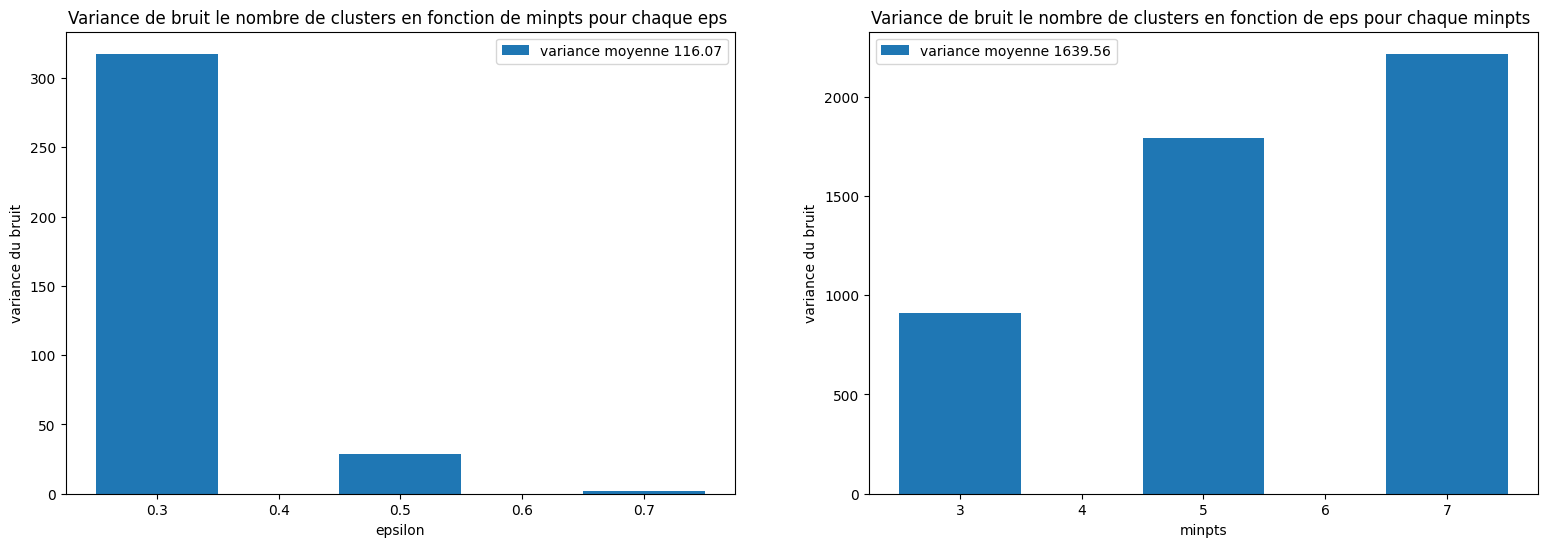

In [9]:
# Supposons que vous avez les tableaux array1, array2, index1 et index2

eps = np.array(eps)
minpts = np.array(minpts)


# Largeur des barres
bar_width = 1
eps_bar_width = 0.10

# Créer la figure et les axes
plt.subplots(1, 2, figsize=(19, 6))

plt.subplot(1, 2, 1)
# Créer les barres pour le premier tableau
plt.bar(eps, var_eps_Bruit, eps_bar_width, label=f"variance moyenne {np.round(np.mean(var_eps_Bruit), 2)}")
plt.xlabel('epsilon')
plt.ylabel('variance du bruit')
plt.title('Variance de bruit le nombre de clusters en fonction de minpts pour chaque eps ')
plt.legend()

plt.subplot(1, 2 ,2)
# Créer les barres pour le deuxième tableau
plt.bar(minpts, var_minpts_Bruit, bar_width, label=f"variance moyenne {np.round(np.mean(var_minpts_Bruit), 2)}")

# Ajouter des labels et un titre
plt.xlabel('minpts')
plt.ylabel('variance du bruit')
plt.title('Variance de bruit le nombre de clusters en fonction de eps pour chaque minpts ')
plt.legend()
# Afficher le graphique
plt.show()


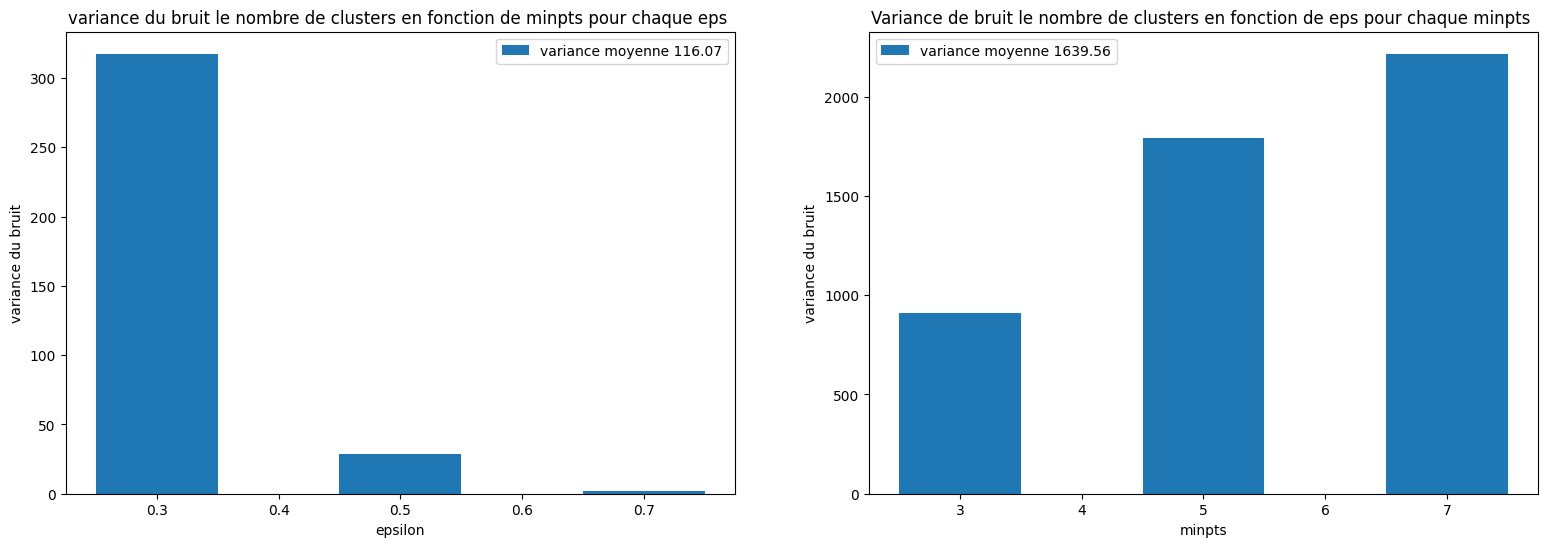

In [10]:
# Largeur des barres
bar_width = 1
eps_bar_width = 0.10

# Créer la figure et les axes
plt.subplots(1, 2, figsize=(19, 6))

plt.subplot(1, 2, 1)
# Créer les barres pour le premier tableau
plt.bar(eps, var_eps_Bruit, eps_bar_width, label=f"variance moyenne {np.round(np.mean(var_eps_Bruit), 2)}")
plt.xlabel('epsilon')
plt.ylabel('variance du bruit')
plt.title('variance du bruit le nombre de clusters en fonction de minpts pour chaque eps ')
plt.legend()

plt.subplot(1, 2 ,2)
# Créer les barres pour le deuxième tableau
plt.bar(minpts, var_minpts_Bruit, bar_width, label=f"variance moyenne {np.round(np.mean(var_minpts_Bruit), 2)}")

# Ajouter des labels et un titre
plt.xlabel('minpts')
plt.ylabel('variance du bruit')
plt.title('Variance de bruit le nombre de clusters en fonction de eps pour chaque minpts ')

plt.legend()
# Afficher le graphique
plt.show()


# Données circulaires

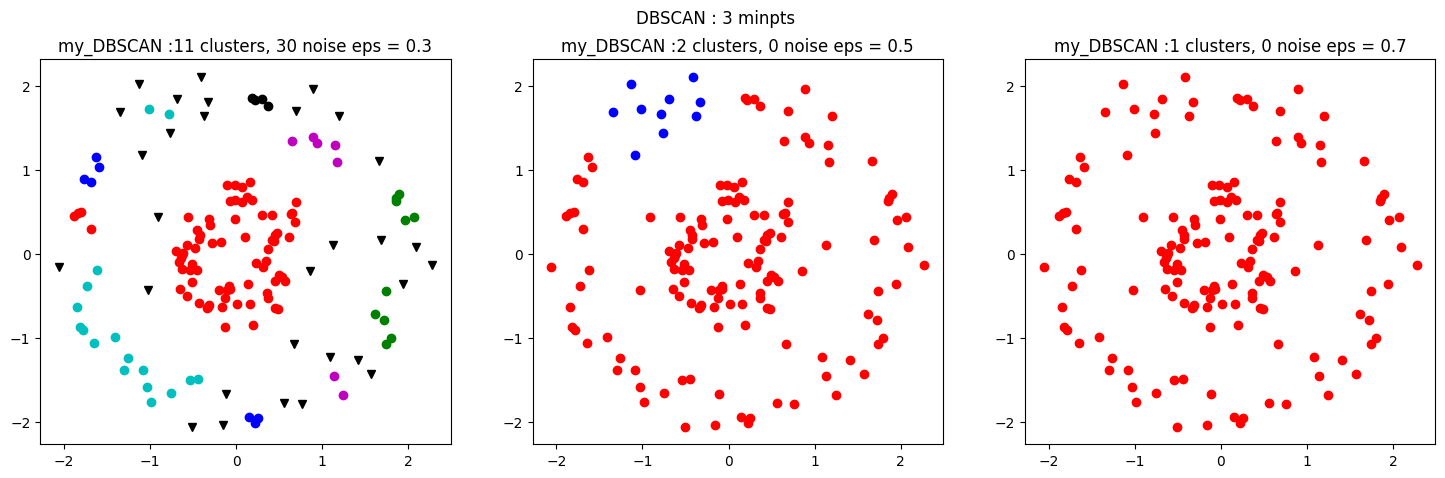

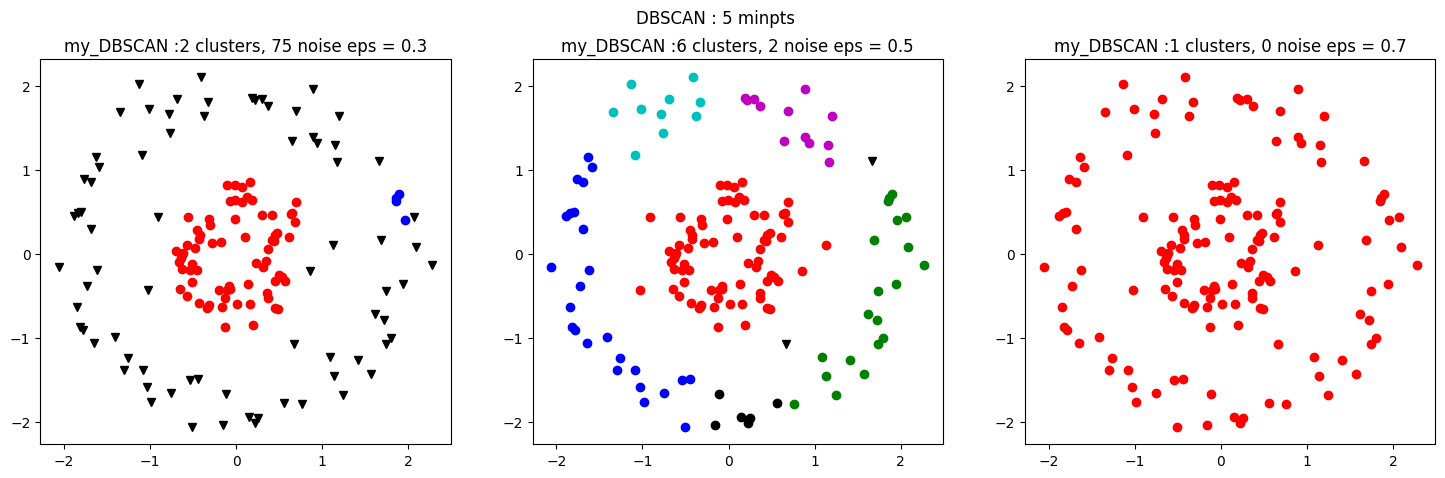

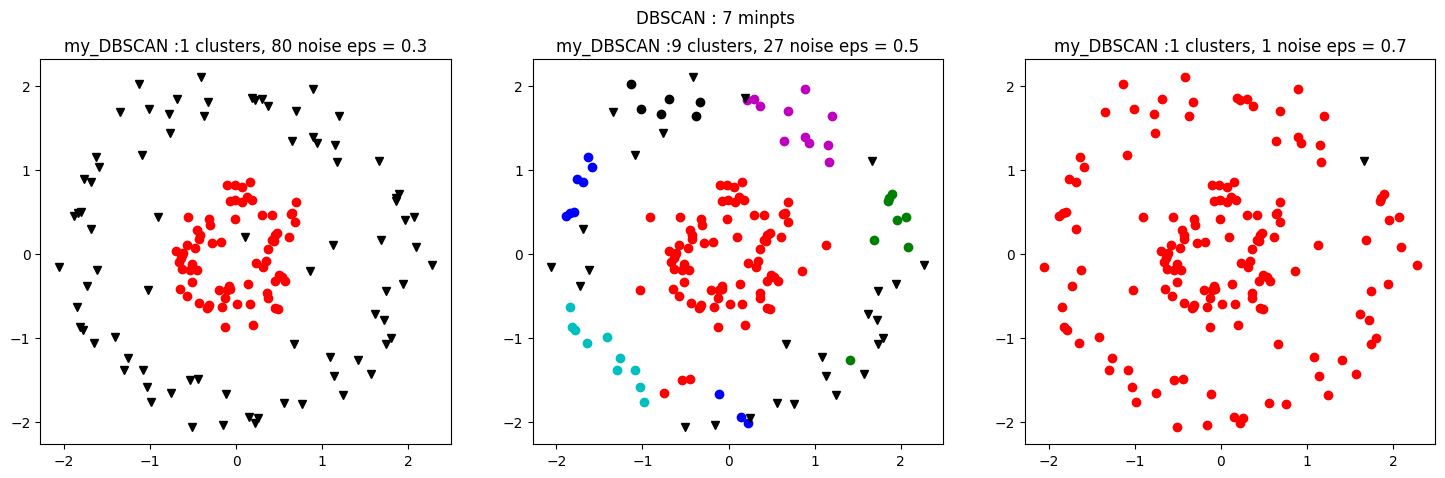

In [11]:
X_c, y = make_circles(n_samples=150, factor=0.3, noise=0.1)
X_c = StandardScaler().fit_transform(X_c)
results = []

for minpt in minpts:
    visualisation_iris(X_c, minpt)


In [12]:
results = np.array(results)
results = results.reshape((len(eps),len(minpts),2))
p = pd.DataFrame( index=eps, columns=minpts, )
for i in range(len(eps)):
    for j in range(len(minpts)):
        p.loc[eps[i],minpts[j]] = results[i,j]

print(p)

            3        5       7
0.3  [11, 30]   [2, 0]  [1, 0]
0.5   [2, 75]   [6, 2]  [1, 0]
0.7   [1, 80]  [9, 27]  [1, 1]


In [13]:
print("nombre de cluster")
# variance du nombre de cluster en fonction de eps et minpts 
print("eps fixé", np.var(results[:, :, 0], axis=0)) # eps fixé
print("minpts fixé", np.var(results[:, :, 0], axis=1)) # minpts fixé

print("nombre de bruit")
# variance du nombre de bruit en fonction de eps et minpts
print("eps fixé", np.var(results[:, :, 1], axis=0)) # eps fixé
print("minpts fixé", np.var(results[:, :, 1], axis=1)) # minpts fixé

nombre de cluster
eps fixé [20.22222222  8.22222222  0.        ]
minpts fixé [20.22222222  4.66666667 14.22222222]
nombre de bruit
eps fixé [5.05555556e+02 1.50888889e+02 2.22222222e-01]
minpts fixé [ 200.         1217.55555556 1080.66666667]


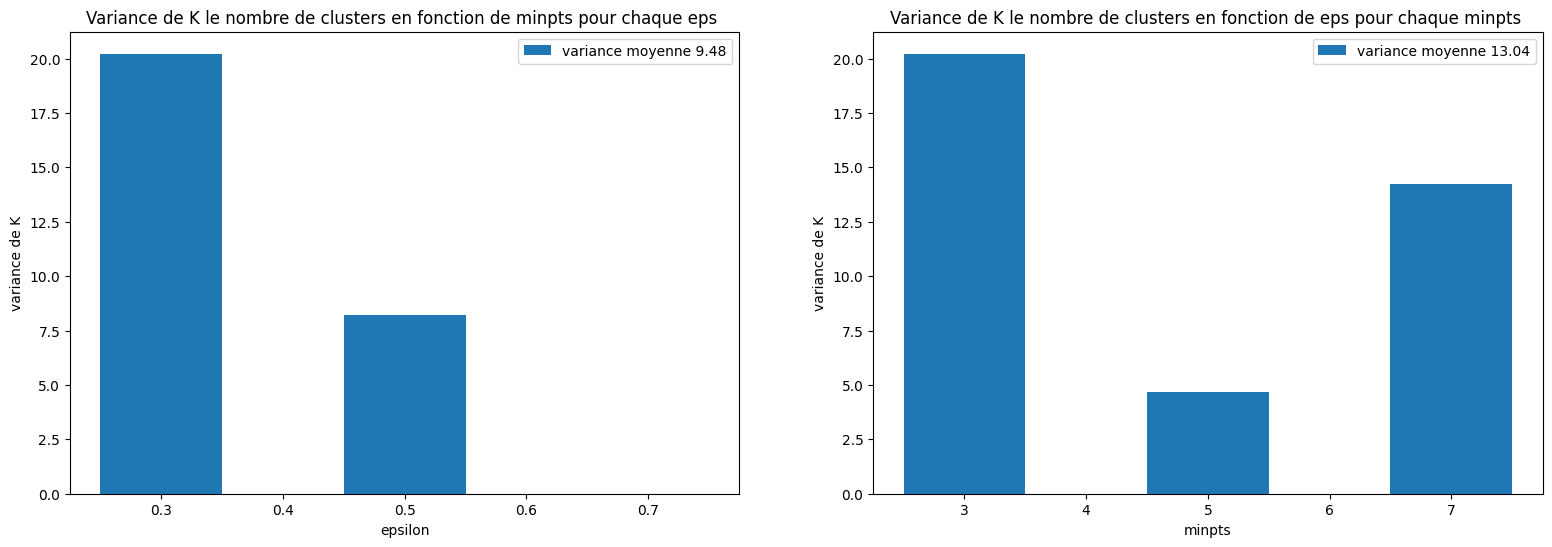

In [14]:
# Supposons que vous avez les tableaux array1, array2, index1 et index2


var_eps_K = np.var(results[:, :, 0], axis=0)
var_minpts_K = np.var(results[:, :, 0], axis=1)
var_eps_Bruit = np.var(results[:, :, 1], axis=0)
var_minpts_Bruit = np.var(results[:, :, 1], axis=1)

eps = np.array(eps)
minpts = np.array(minpts)


# Largeur des barres
bar_width = 1
eps_bar_width = 0.10

# Créer la figure et les axes
plt.subplots(1, 2, figsize=(19, 6))

plt.subplot(1, 2, 1)
# Créer les barres pour le premier tableau
plt.bar(eps, var_eps_K, eps_bar_width, label=f"variance moyenne {np.round(np.mean(var_eps_K), 2)}")
plt.xlabel('epsilon')
plt.ylabel('variance de K')
plt.title('Variance de K le nombre de clusters en fonction de minpts pour chaque eps ')
plt.legend()

plt.subplot(1, 2 ,2)
# Créer les barres pour le deuxième tableau
plt.bar(minpts, var_minpts_K, bar_width, label=f"variance moyenne {np.round(np.mean(var_minpts_K), 2)}")

# Ajouter des labels et un titre
plt.xlabel('minpts')
plt.ylabel('variance de K')
plt.title('Variance de K le nombre de clusters en fonction de eps pour chaque minpts ')
plt.legend()
# Afficher le graphique
plt.show()

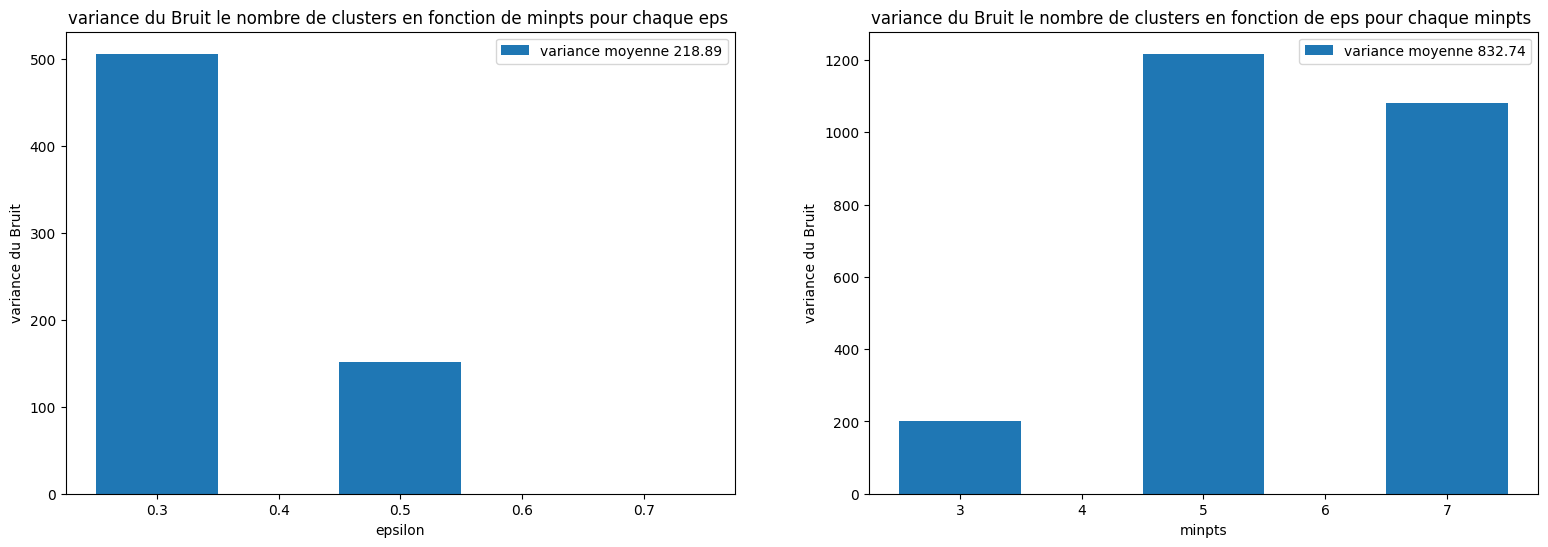

In [15]:
# Supposons que vous avez les tableaux array1, array2, index1 et index2

eps = np.array(eps)
minpts = np.array(minpts)


# Largeur des barres
bar_width = 1
eps_bar_width = 0.10

# Créer la figure et les axes
plt.subplots(1, 2, figsize=(19, 6))

plt.subplot(1, 2, 1)
# Créer les barres pour le premier tableau
plt.bar(eps, var_eps_Bruit, eps_bar_width, label=f"variance moyenne {np.round(np.mean(var_eps_Bruit), 2)}")
plt.xlabel('epsilon')
plt.ylabel('variance du Bruit')
plt.title('variance du Bruit le nombre de clusters en fonction de minpts pour chaque eps ')
plt.legend()
plt.subplot(1, 2 ,2)
# Créer les barres pour le deuxième tableau
plt.bar(minpts, var_minpts_Bruit, bar_width, label=f"variance moyenne {np.round(np.mean(var_minpts_Bruit), 2)}")

# Ajouter des labels et un titre
plt.xlabel('minpts')
plt.ylabel('variance du Bruit')
plt.title('variance du Bruit le nombre de clusters en fonction de eps pour chaque minpts ')
plt.legend()
# Afficher le graphique
plt.show()


# DBSCAN avec estimation des parametres

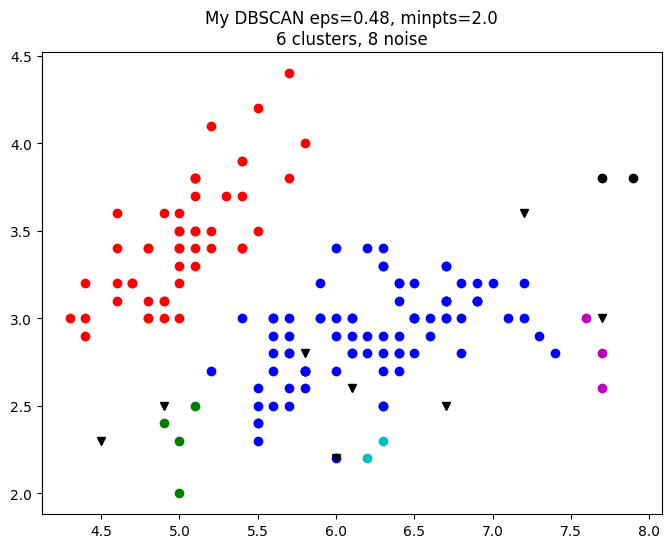

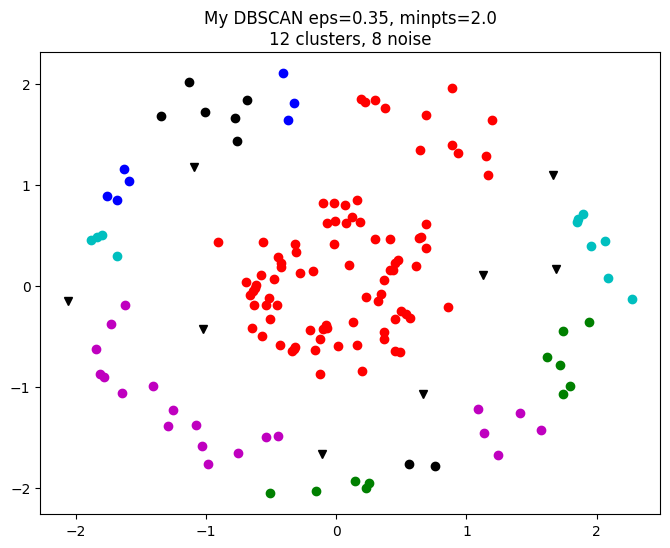

In [17]:
my_y = my_DBSCAN(X, Visualisation=True)
# visualize_dbscan(X, my_y, title="My DBSCAN on Iris dataset")

my_y = my_DBSCAN(X_c, Visualisation=True)
# visualize_dbscan(X_c, my_y, title="My DBSCAN on Circles dataset")
